In [1]:
import torch

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib import style
from mpl_toolkits.axes_grid1 import make_axes_locatable
from IPython.display import HTML

In [2]:
x = torch.arange(0.,6.)

In [3]:
# w = torch.rand(1, requires_grad=True)
w = torch.tensor([-4.], requires_grad=True)
b = torch.rand(1, requires_grad=True)

In [4]:
def f(x):
    return 3*x**2 + 1

In [5]:
y_true = f(x)

# Backpropagation

$ \large
\begin{align} 
\frac{\partial{J}}{\partial{w}} &= \frac{\partial{}}{\partial{w}}\sum_{i=0}^{N}(y_i-wx_i)^2 \\ 
\large &= 2\sum_{i=0}^{N}(y_i-wx_i)(-x_i)
\end{align}
$

In [6]:
def mse(y_true, y_pred):
    if len(y_true.shape) or len(y_pred.shape) == 1:
        y_true = y_true.view(-1,1)
        y_pred = y_pred.view(-1,1)
    delta = y_true - y_pred
    return (delta**2).mean()

In [7]:
mes_torch = torch.nn.MSELoss()

In [83]:
w_history = []
b_history = []

loss_history = []
y_pred_history = []

activation = torch.nn.Identity()

lr = 3e-2

linear1 = torch.nn.Linear(1,1)
param = linear1.parameters()
w = next(param)
b = next(param)

for i in range(50):
    w_history.append(w.data.clone())   
    b_history.append(b.data.clone())
    
    # Calculate Loss
    y_pred = linear1(x.view(-1,1))
    y_pred_history.append(y_pred.data.clone())
    loss = mse(y_true, y_pred)
    loss_history.append(loss.data)
    
    # Calculate gradients
    loss.backward()
    
    # Update parameters
    with torch.no_grad():
        w -= w.grad * lr
        b -= b.grad * lr
    w.grad.zero_()
    b.grad.zero_()

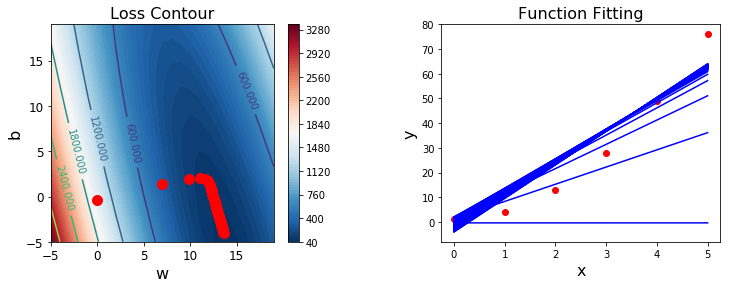

In [89]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,4))
fig.subplots_adjust(wspace = 0.4)

ims = []

# LHS

# This is for visualization only, the machine learning model cannot see the full picture
w_range = torch.arange(-5.,20.)
b_range = torch.arange(-5.,20.)
W, B = torch.meshgrid(w_range, b_range)
Y_pred = torch.zeros((W.shape[0],W.shape[1],x.shape[0]))

# Y_pred = torch.unsqueeze(W, dim=-1)*x + torch.unsqueeze(B, dim=-1) 
for index1, (rowW, rowB) in enumerate(zip(W,B)):
    for index2,(i,j) in enumerate(zip(rowW, rowB)):
        with torch.no_grad():
            w.copy_(i)
            b.copy_(j)
            
        Y_pred[index1][index2] = linear1(x.view(-1,1)).view(-1).data

Y_pred = activation(Y_pred)
Y_true = torch.unsqueeze(torch.unsqueeze(y_true, dim=0), dim=0)

Z = (Y_pred - Y_true)**2
Z = Z.mean(-1)

CS = ax1.contour(W, B, Z, levels=5)
im1 = ax1.contourf(W, B, Z, levels=100, cmap="RdBu_r")
ax1.set_xlabel('w', fontsize=16)
ax1.set_ylabel('b', fontsize=16)
fig.colorbar(im1, ax=ax1)
ax1.clabel(CS, inline=1, fontsize=10)
ax1.set_title('Loss Contour', fontsize= 16)
ax1.tick_params(axis='both', labelsize=12)


# im1, = ax1.plot(w_range.detach().numpy(), loss_list, linewidth=3,zorder=-1)
# ax1.set_title("Loss vs Parameters", fontsize=18)
# ax1.tick_params(axis='both', labelsize=12)
# ax1.set_xlabel('w', fontsize=16)
# ax1.set_ylabel('loss', fontsize=16)
# ax1.grid(True)

# RHS
# im2, = ax2.plot(w_range.detach().numpy(), w_range.grad.numpy(), linewidth=3, zorder=-1)
# ax2.set_title("Gradient of Loss w.r.t. w", fontsize=18)
# ax2.tick_params(axis='both', labelsize=12)
# ax2.set_xlabel('w', fontsize=16)
# ax2.set_ylabel('Gradient', fontsize=16)
# ax2.grid(True)

im2, = ax2.plot(y_true.data.numpy(), 'ro',)
ax2.set_title("Function Fitting", fontsize=16)
ax2.set_xlabel('x', fontsize=16)
ax2.set_ylabel('y', fontsize=16)

for i in range(len(w_history)):
    im1 = ax1.scatter(w_history[i].detach(),b_history[i].detach(), c='red', s=100,vmin=0, vmax=len(w_history), cmap='jet')
#     im2 = ax2.scatter(w_history[i].detach(),wgrad_history[i], c='red', s=100,vmin=0, vmax=len(w_history), cmap='jet')
    im2, = ax2.plot(y_pred_history[i].numpy(), c='b')
    ims.append([im1,im2])

In [ ]:
ani = animation.ArtistAnimation(fig, ims, interval=150, blit=True,
                                repeat_delay=1000)

In [ ]:
HTML(ani.to_html5_video())

In [ ]:
origY